In [9]:
import deeplabcut

config_path = deeplabcut.create_new_project(
    'FESFatigue', 
    'Jake', 
    ['/home/jakejoseph/Desktop/Joseph_Code/FESNewCameraclips-Jake-2024-05-05/videos/fatiguetest0523ecrb12_2.mp4'], 
    working_directory='/home/jakejoseph/Desktop/Joseph_Code/', 
    copy_videos=True, 
    multianimal=False
)


Project "/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-06-03" already exists!


In [1]:
import deeplabcut
config_path = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/config.yaml'
# deeplabcut.add_new_videos(config_path, ['/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/ECRB_interleaved_stim_5_30_1.mp4','/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4'])
# deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=True)

2024-06-21 12:22:01.804401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 12:22:02.161994: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-21 12:22:02.287243: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-21 12:22:03.117426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Loading DLC 2.3.10...


In [5]:
deeplabcut.label_frames(config_path)

In [6]:
deeplabcut.create_training_dataset(config_path, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([48, 74, 59, 54, 34, 26, 68, 33, 45, 69, 27, 60,  3, 42, 43,  7, 22,
          41, 50, 38, 61, 53, 62, 56, 72,  6, 52, 70,  4, 30, 49,  2, 28, 11,
          23, 10, 31, 40, 57,  1, 32, 66, 14, 76, 19, 29, 63, 35, 18,  0, 75,
          15,  5, 55, 16, 51, 20, 71,  8, 13, 25, 37, 17, 24, 46, 39, 65, 58,
          12, 36, 21,  9, 73]),
   array([67, 64, 47, 44])))]

In [7]:
deeplabcut.train_network(config_path, shuffle=1, displayiters=100, saveiters=1000)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-2/UnaugmentedDataSet_FESFatigueMay31/FESFatigue_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-1/FESFatigueMay31-trainset95shuffle1/train/snapshot-297000',
 'intermediate_supervision': False

Selecting single-animal trainer
Batch Size is 1


/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-06-21 14:34:13.195185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-21 14:34:13.198397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-21 14:34:13.200002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-21 14:34:13.201623: I tensorfl

Loading already trained DLC with backbone: resnet_50
Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-2/FESFatigueMay31-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints'

iteration: 297100 loss: 0.0031 lr: 0.005
iteration: 297200 loss: 0.0025 lr: 0.005
iteration: 297300 loss: 0.0025 lr: 0.005
iteration: 297400 loss: 0.0026 lr: 0.005
iteration: 297500 loss: 0.0020 lr: 0.005
iteration: 297600 loss: 0.0019 lr: 0.005
iteration: 297700 loss: 0.0021 lr: 0.005
iteration: 297800 loss: 0.0022 lr: 0.005
iteration: 297900 loss: 0.0021 lr: 0.005
iteration: 298000 loss: 0.0019 lr: 0.005
iteration: 298100 loss: 0.0020 lr: 0.005
iteration: 298200 loss: 0.0021 lr: 0.005
iteration: 298300 loss: 0.0018 lr: 0.005
iteration: 298400 loss: 0.0019 lr: 0.005
iteration: 298500 loss: 0.0018 lr: 0.005
iteration: 298600 loss: 0.0018 lr: 0.005
iteration: 298700 loss: 0.0022 lr: 0.005
iteration: 298800 loss: 0.0018 lr: 0.005
iteration: 298900 loss: 0.0020 lr: 0.005
iteration: 299000 loss: 0.0018 lr: 0.005
iteration: 299100 loss: 0.0024 lr: 0.005
iteration: 299200 loss: 0.0024 lr: 0.005
iteration: 299300 loss: 0.0017 lr: 0.005
iteration: 299400 loss: 0.0022 lr: 0.005
iteration: 29950

KeyboardInterrupt: 

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FESNewCameraApr19/FESNewCamera_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffle': True,
 'snapsho

Running  DLC_resnet50_FESNewCameraApr19shuffle1_50000  with # of training iterations: 50000
Running evaluation ...


20it [00:19,  1.03it/s]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:930: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  DataMachine.to_hdf(resultsfilename, "df_with_missing")


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-50000
Results for 50000  training iterations: 95 1 train error: 2.36 pixels. Test error: 28.35  pixels.
With pcutoff of 0.6  train error: 2.36 pixels. Test error: 33.95 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


  0%|          | 0/20 [00:00<?, ?it/s]/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DataCombined[loopscorer][bp]["y"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + DataCombined[loopscorer][bp]["x"][imagenr]
/home/jakejoseph/Desktop/Joseph_Code/DeepLabCut/deeplabcut/utils/visualization.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


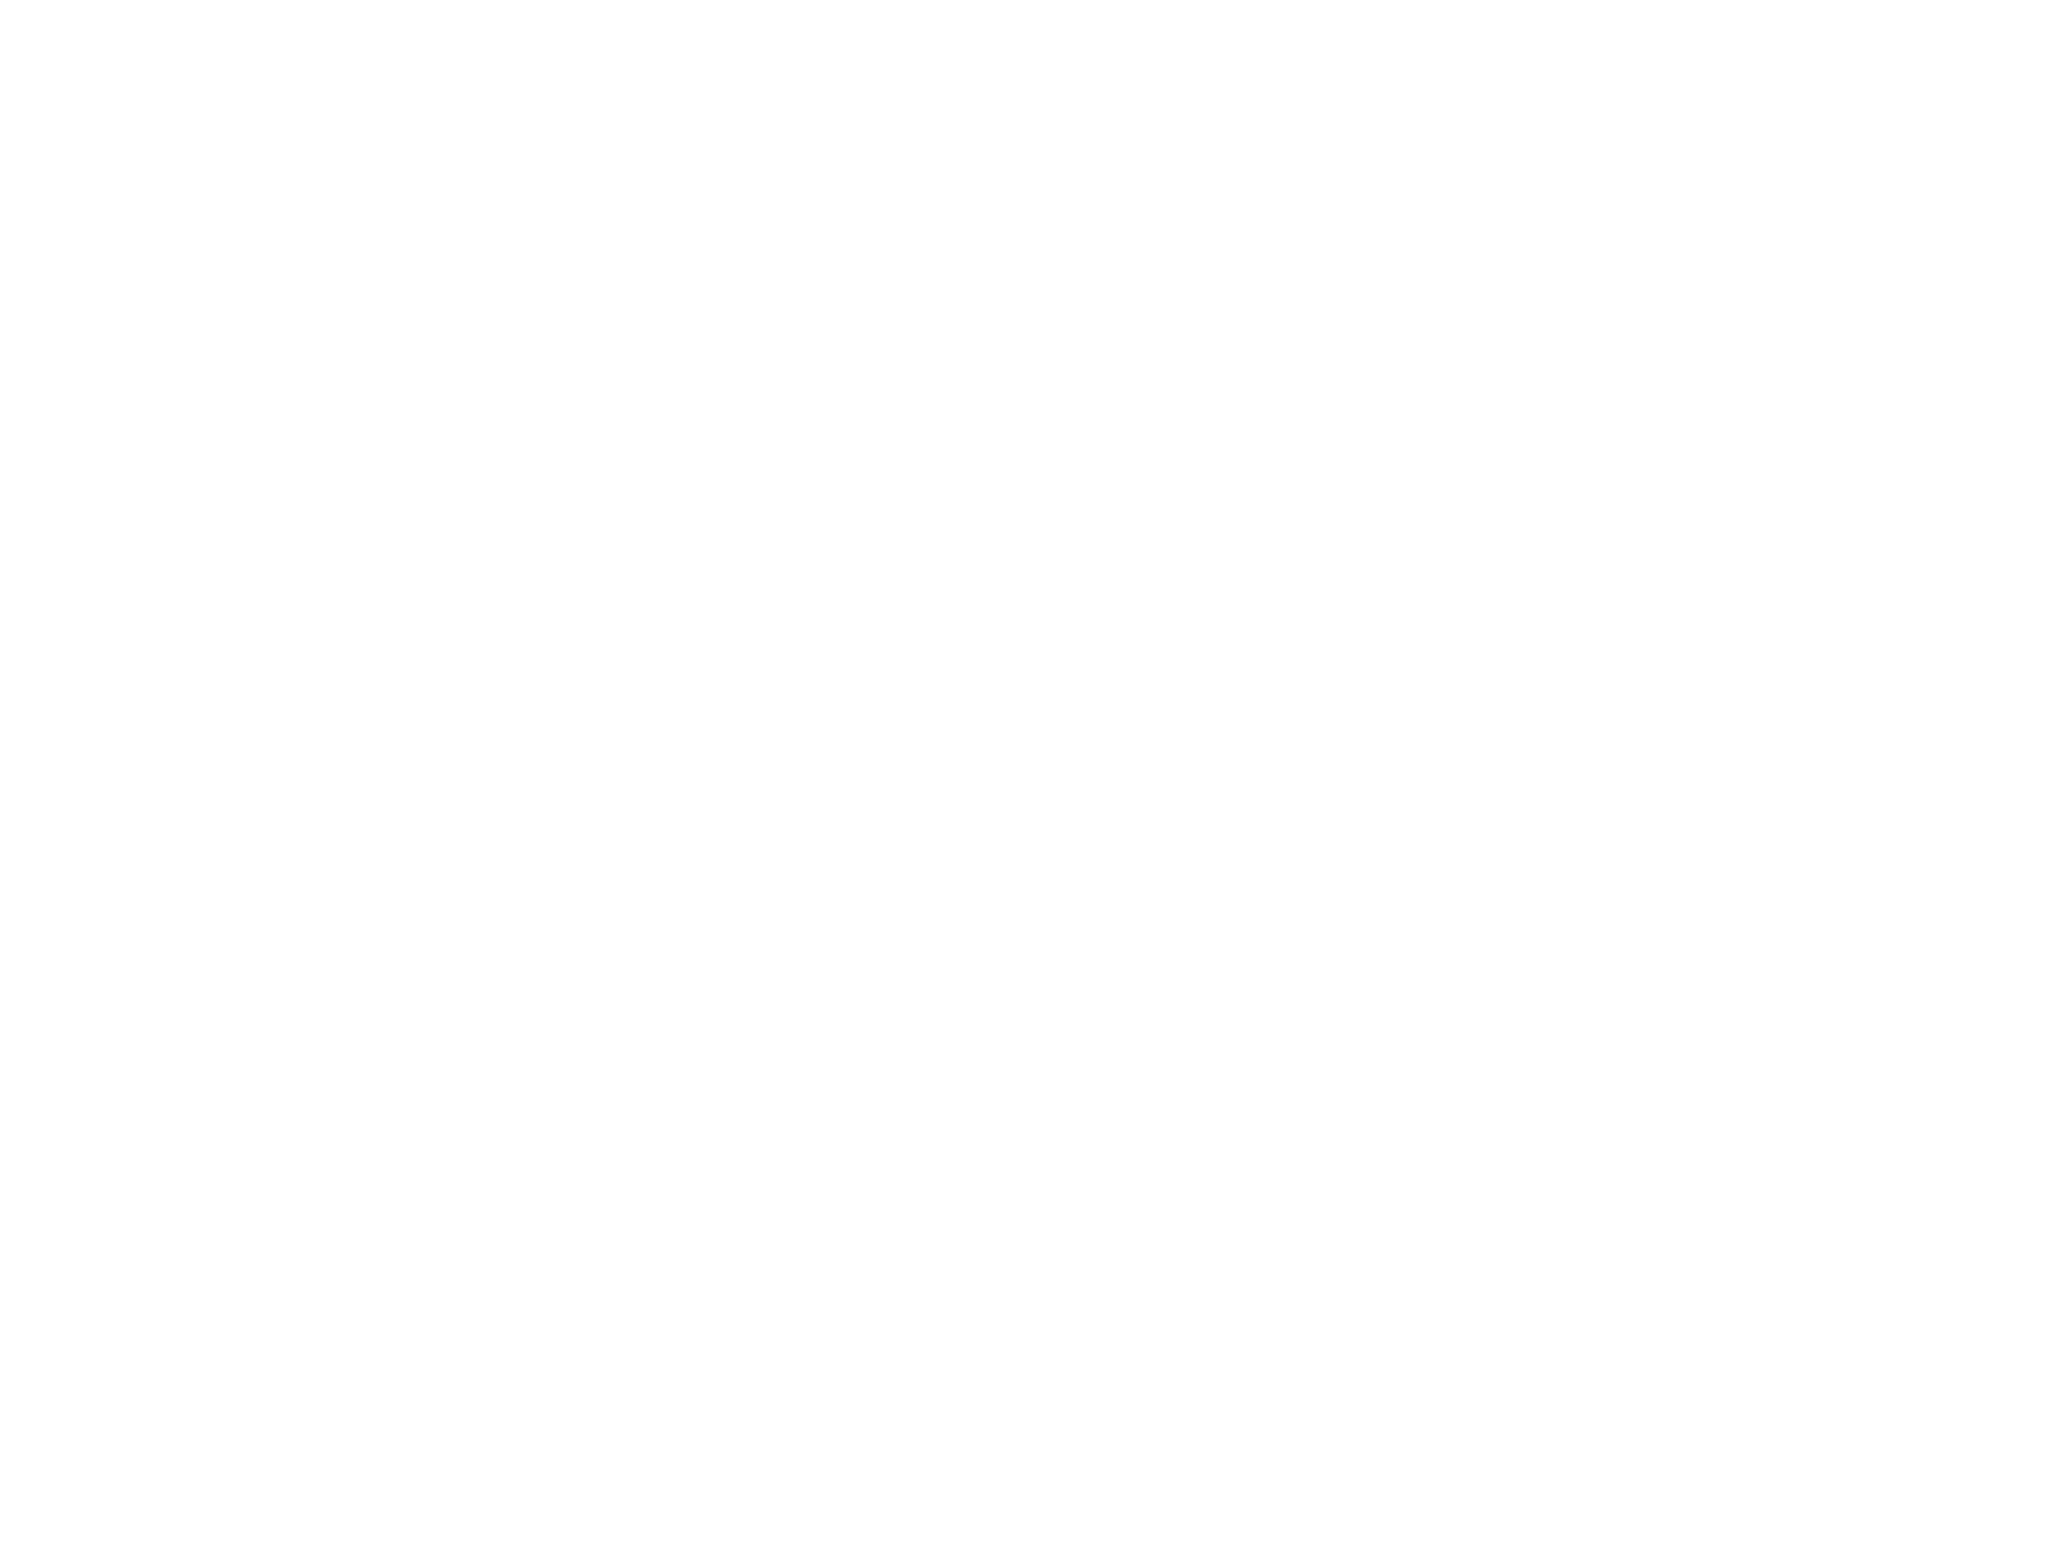

In [4]:
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=True)

In [11]:
video = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/ECRB_interleaved_stim_5_30_1.mp4'
config_path = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/config.yaml'
deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
# deeplabcut.extract_outlier_frames(config_path, video,outlieralgorithm='uncertain',p_bound=0.05)

Using snapshot-2000 for model /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-0/FESFatigueMay31-trainset95shuffle1


/home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2024-06-03 10:17:06.392409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-03 10:17:06.392612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jakejoseph/anaconda3/envs/dlcv22/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-06-03 10:17:06.392653: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

Starting to analyze %  /home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4
Loading  /home/jakejoseph/Desktop/Joseph_Code/FESNewCamera-Jake-2024-04-19/videos/Individual Motor Points top 03-05.mp4
Duration of video [s]:  2355.87 , recorded with  30.0 fps!
Overall # of frames:  70676  found with (before cropping) frame dimensions:  2048 1536
Starting to extract posture


  3%|▎         | 2024/70676 [31:23<21:18:04,  1.12s/it]

In [10]:
videos = ['/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigue_6_13_2024_2.mp4',
           '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueadditional_6_13.mp4',
           '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigue2_6_13.mp4']

video = "/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueEDC24_6_20.mp4"
deeplabcut.analyze_videos(config_path, video, shuffle=1, save_as_csv=True, videotype='mp4')
deeplabcut.create_labeled_video(config_path, video, videotype = 'mp4', save_frames=False)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['DIP', 'PIP', 'MCP', 'Wrist', 'Forearm'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-2/UnaugmentedDataSet_FESFatigueMay31/FESFatigue_Jake95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/jakejoseph/anaconda3/envs/DEEPLABCUT/lib/python3.9/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 'shuffl

Using snapshot-355000 for model /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/dlc-models/iteration-2/FESFatigueMay31-trainset95shuffle1


2024-06-27 15:17:52.787364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-27 15:17:52.788692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-27 15:17:52.789819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-27 15:17:52.790940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-27 15:17:52.792043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Starting to analyze %  /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueEDC24_6_20.mp4
Loading  /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueEDC24_6_20.mp4
Duration of video [s]:  1248.6 , recorded with  30.0 fps!
Overall # of frames:  37458  found with (before cropping) frame dimensions:  2048 1536
Starting to extract posture


100%|██████████| 37458/37458 [42:46<00:00, 14.59it/s]


Saving results in /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Starting to process video: /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueEDC24_6_20.mp4
Loading /home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueEDC24_6_20.mp4 and data.
Duration of video [s]: 1248.6, recorded with 30.0 fps!
Overall # of frames: 37458 with cropped frame dimensions: 2048 1536
Generating frames and creating video.


100%|██████████| 37458/37458 [08:52<00:00, 70.36it/s]


[True]

In [5]:
# # new_video = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/fatiguetest0523ecrb12_2.mp4'
# videos = ['/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigue_6_13_2024_2.mp4',
#            '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigueadditional_6_13.mp4',
#            '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/rhodesfatigue2_6_13.mp4']
# original_videos = ['/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/ECRB_interleaved_stim_5_30_1.mp4',
#                     '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/fatiguetest0523ecrb12_2.mp4',
                    # '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4']
# deeplabcut.extract_outlier_frames(config_path, video, automatic=True)
deeplabcut.refine_labels(config_path)

In [6]:
deeplabcut.merge_datasets(config_path)
deeplabcut.create_training_dataset(config_path, net_type='resnet_50', augmenter_type='imgaug')

Merged data sets and updated refinement iteration to 2.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 38, 111,  81, 153, 188, 119, 124,  89,  63, 158, 185,   2,  99,
          125, 182, 187,  71, 190,  40, 197, 207, 173, 100,  28, 121,  23,
          146, 109,  29,   5,  91, 106,  46, 181,  26, 103,  69,  18,  27,
            6, 110, 151, 122, 144, 172, 194, 167,  16, 113,  87,  33, 117,
          162,  57, 169, 165,  11,  47,  39,  74, 178,  85,  79, 136,  13,
           62,  20,  78, 148,  84,  42,   9, 108, 152,  94, 183,  34,  10,
            8, 154, 184, 155,  72,  68, 130, 192, 161,  15,  75,  70, 104,
           54, 139, 195, 132,  67, 171, 142, 176,  14, 193, 186,  53,  31,
          202,  32,  80, 123,  65, 131, 114, 107,  45,  60, 166,  98, 189,
           48, 164,  88,  21,  86,  36, 200, 198,  59, 133, 191, 143,  35,
          160, 102,  97, 199,   4, 174,  96,  90, 118,  64, 126,  51,  50,
          206, 120, 205, 204, 177, 170,  25, 140,  58,  22,  12, 129, 163,
           56, 138,  49,  76,  17,   1, 150,  19, 168,  73, 135,  83,  44,
          11